In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('tata-global.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [45]:
#df.index=df['Date']

<function matplotlib.pyplot.show(*args, **kw)>

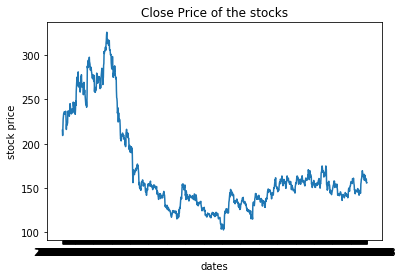

In [5]:
plt.plot(df.Date,df.Close)
plt.title('Close Price of the stocks')
plt.xlabel('dates')
plt.ylabel('stock price')
plt.show

In [6]:
df_date_close=df[['Date','Close']]
df_date_close

,Date,Close
0,2018-10-08,215.15
1,2018-10-05,209.20
2,2018-10-04,218.20
3,2018-10-03,227.60
4,2018-10-01,230.90
...,...,...
1230,2013-10-14,159.45
1231,2013-10-11,160.05
1232,2013-10-10,160.15
1233,2013-10-09,155.55


In [7]:
df_date_close=df_date_close.sort_values(by=['Date'])
df_date_close.drop('Date',axis=1,inplace=True)

In [8]:
final_dataset=df_date_close.values
train_data=final_dataset[:987,:]
validation_data=final_dataset[987:,:]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train_data)
test=scaler.transform(validation_data)

In [11]:
train.shape[0]

987

In [77]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)


In [78]:
look_back=60
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [87]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape , testX.shape

((927, 60, 1), (188, 60, 1))

In [83]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


In [90]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(look_back,1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(trainX,trainY,epochs=1,batch_size=1,verbose=2)


Epoch 1/1
 - 63s - loss: 0.0050


In [95]:
testpredict=lstm_model.predict(testX)
testpredict=scaler.inverse_transform(testpredict).ravel()

trainPredict=lstm_model.predict(trainX)
trainPredict=scaler.inverse_transform(trainPredict).ravel()

testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testpredict.shape, testTrue.shape

((188,), (188,))

In [118]:
testpredict

array([325.63947, 326.50064, 327.02045, 327.36768, 328.22452, 328.90637,
       329.2376 , 329.2247 , 330.7845 , 332.57355, 333.32684, 333.03043,
       331.05557, 328.86218, 326.91324, 325.1373 , 323.301  , 321.71225,
       320.14377, 319.14462, 316.6762 , 313.45236, 308.2828 , 302.52518,
       296.28366, 292.6517 , 291.00278, 290.4231 , 291.59106, 293.1292 ,
       294.26004, 294.49747, 293.05316, 290.09436, 287.23138, 284.11963,
       282.5719 , 282.51468, 283.54187, 285.1275 , 286.71518, 288.19266,
       289.16095, 288.91254, 288.6647 , 287.67035, 287.52917, 288.17963,
       289.2302 , 290.52676, 290.71606, 288.5106 , 285.48126, 282.54605,
       279.4112 , 276.4744 , 274.70596, 274.08728, 273.48276, 275.6971 ,
       278.87466, 281.52496, 283.92328, 285.77292, 287.78293, 289.2345 ,
       289.9128 , 290.043  , 290.06833, 290.624  , 291.5785 , 293.08636,
       294.99915, 296.88452, 298.09406, 298.6877 , 299.7137 , 301.1259 ,
       302.68668, 304.9064 , 306.4774 , 306.588  , 

In [119]:
testTrue

array([311.2 , 312.25, 312.95, 317.6 , 315.3 , 314.1 , 313.3 , 325.75,
       323.  , 316.4 , 313.55, 305.45, 308.35, 308.85, 307.2 , 304.25,
       304.25, 301.8 , 304.  , 290.65, 288.35, 274.85, 273.1 , 266.7 ,
       280.15, 280.45, 278.25, 285.1 , 281.95, 279.05, 275.6 , 267.95,
       262.85, 266.6 , 262.15, 270.7 , 273.5 , 275.  , 275.5 , 274.85,
       275.65, 274.15, 268.9 , 273.4 , 268.35, 276.05, 278.2 , 278.5 ,
       279.6 , 272.4 , 260.6 , 262.05, 263.2 , 258.85, 257.9 , 262.2 ,
       263.8 , 258.75, 276.95, 274.8 , 270.25, 273.  , 272.7 , 277.8 ,
       275.5 , 273.85, 273.85, 275.5 , 279.65, 280.95, 284.1 , 286.2 ,
       286.3 , 283.6 , 283.15, 289.1 , 291.2 , 292.1 , 297.55, 292.75,
       286.65, 287.8 , 294.2 , 289.7 , 292.  , 285.25, 287.5 , 255.9 ,
       242.65, 241.1 , 247.5 , 244.7 , 243.55, 247.15, 250.2 , 254.5 ,
       257.85, 260.65, 257.5 , 264.5 , 269.2 , 263.25, 255.25, 263.75,
       265.75, 267.1 , 266.95, 263.7 , 267.6 , 269.6 , 277.8 , 272.15,
      

In [116]:
data_df=df.Date
date=data_df.values
date_test=date[927:]
date_test.shape
date_train=date[:927]
date_train.shape


(927,)

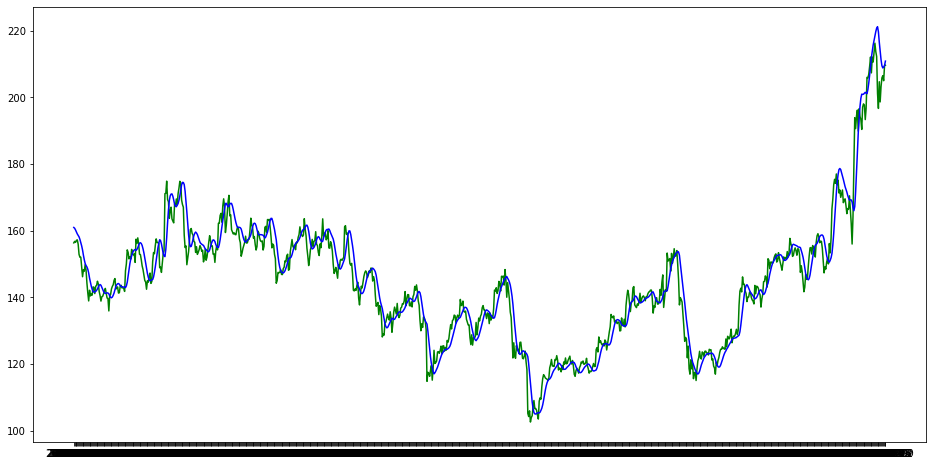

In [117]:
plt.figure(figsize=(16,8))
plt.plot(date_train,trainTrue, c = 'g')
plt.plot(date_train,trainPredict, c = 'b')
plt.show()

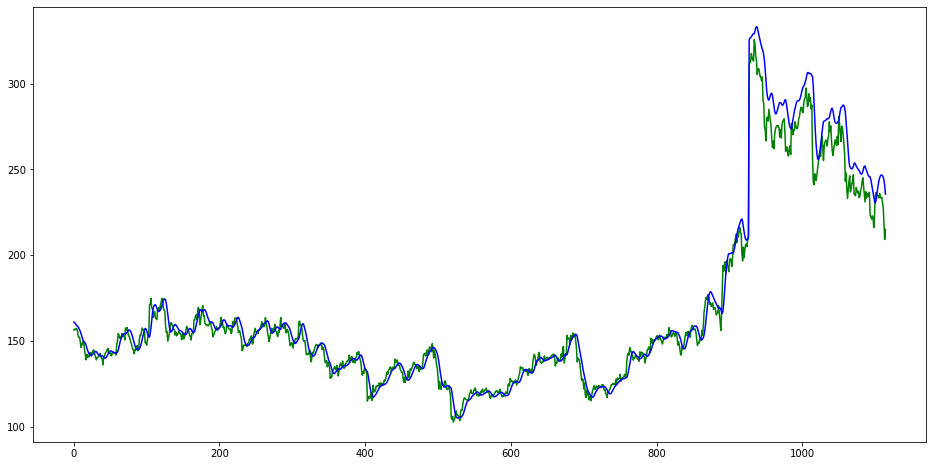

In [106]:
combinedPredicted = np.concatenate((trainPredict, testpredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.figure(figsize=(16,8))
plt.plot(combinedTrue, ,c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()

In [136]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [137]:
from tensorflow.python.keras.optimizers import TFOptimizer


In [138]:
lstm_model.save("saved_model.h5")



AttributeError: module 'tensorflow.keras.optimizers' has no attribute 'TFOptimizer'